In [2]:
## Importing Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, accuracy_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree

# import optuna
from sklearn.ensemble import RandomForestClassifier
import time
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import log_loss
from sklearn.metrics import hinge_loss
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import shap

In [5]:
path = "/Users/woojinheo/Desktop/github/SHAP/data/train.csv"

train_data = pd.read_csv(path).drop('Unnamed: 0', axis=1)

print(train_data.shape)
print(train_data.info())

(103904, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink            

In [4]:
!pip install optuna

In [4]:
train_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
train_data.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [7]:
train_data.dropna(subset='Arrival Delay in Minutes', inplace= True)
print(train_data.isna().sum())

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


# Exploratory Data Analysis

In [6]:
satisfaction_distribution = train_data['satisfaction'].value_counts(normalize=True) * 100
print("Satisfaction Percentage Distribution:")
print(satisfaction_distribution)

Satisfaction Percentage Distribution:
neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: satisfaction, dtype: float64


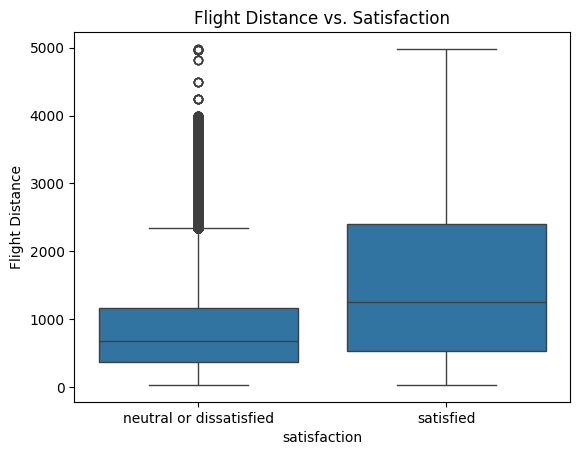

In [7]:
# Target Variable Analysis

sns.boxplot(x="satisfaction", y="Flight Distance", data=train_data)
plt.title("Flight Distance vs. Satisfaction")
plt.show()

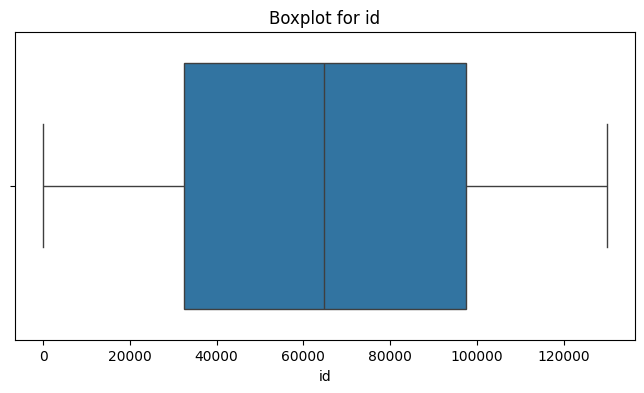

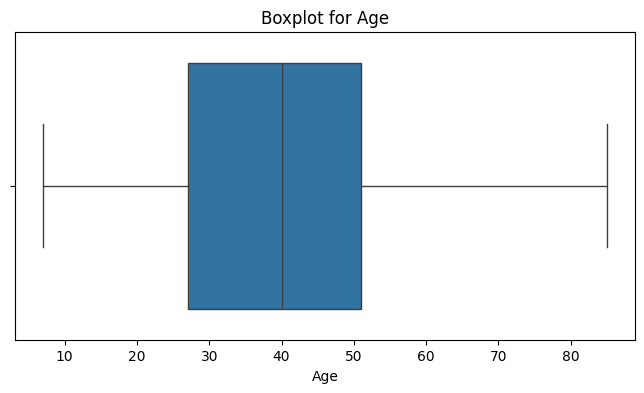

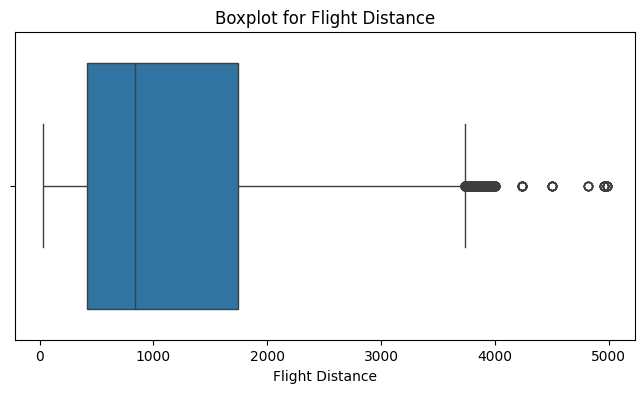

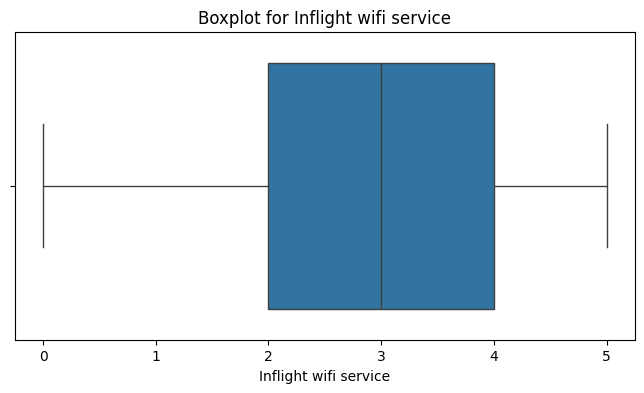

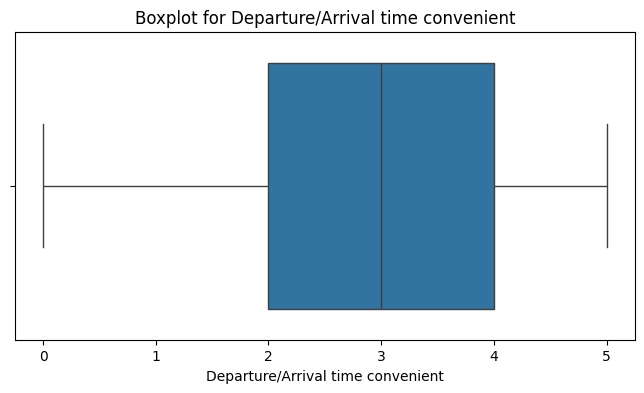

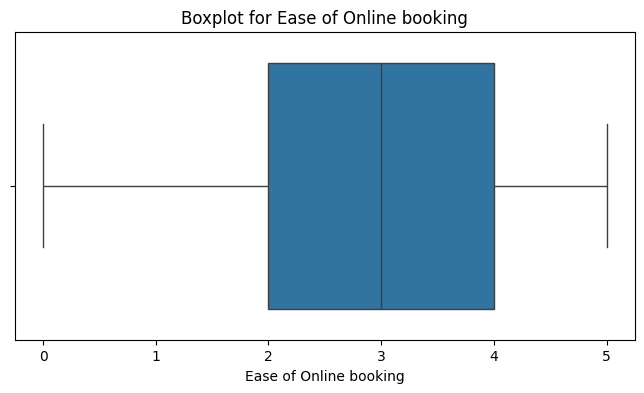

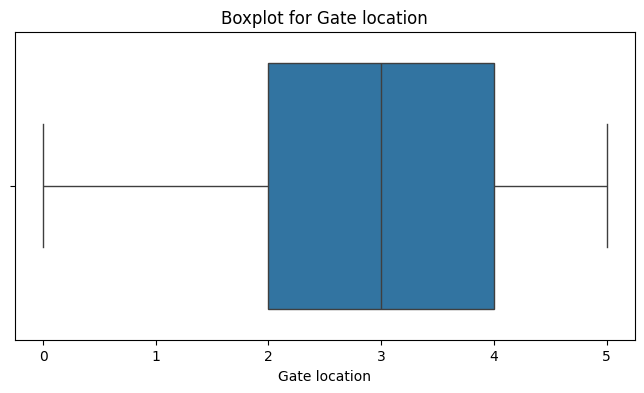

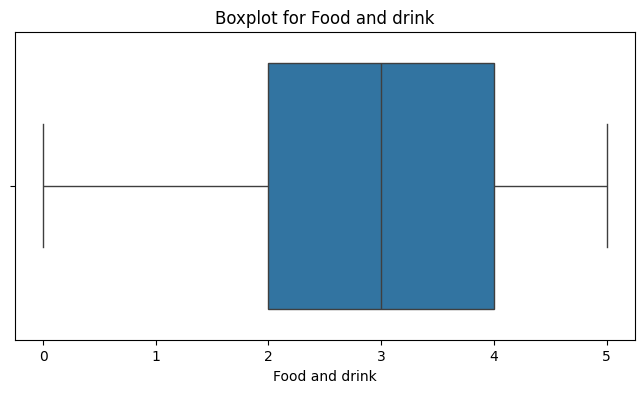

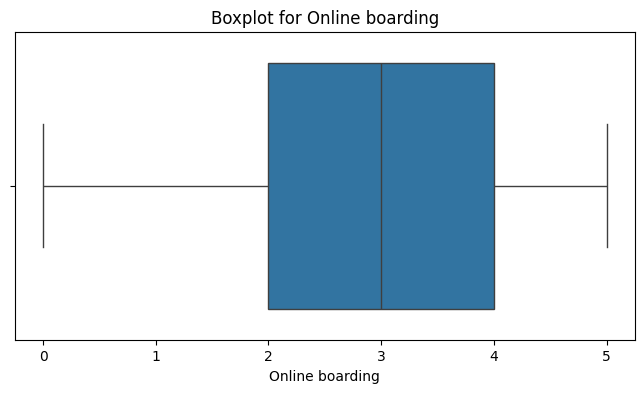

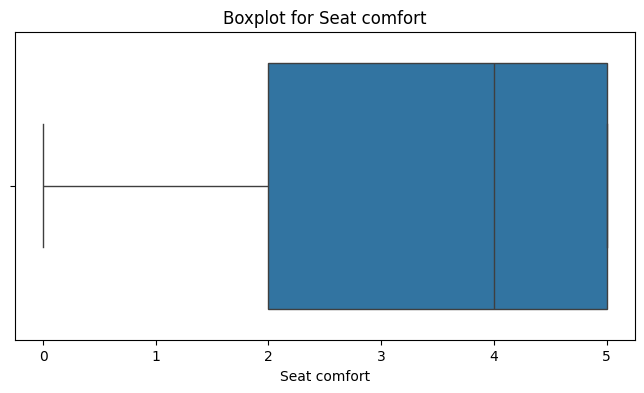

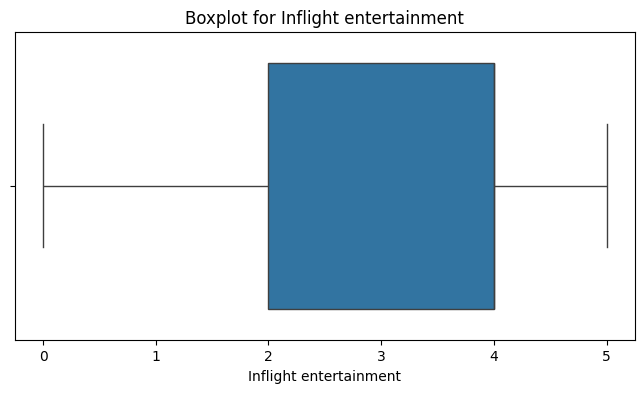

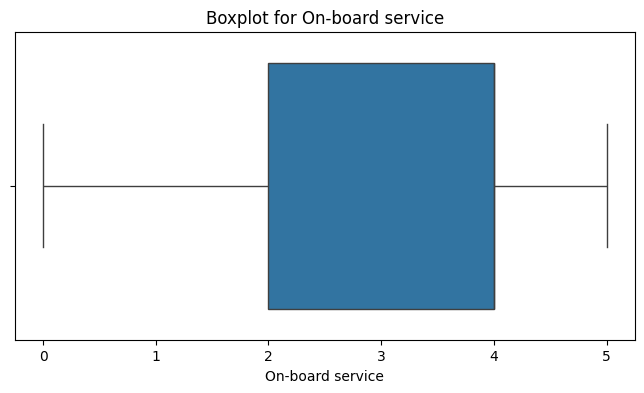

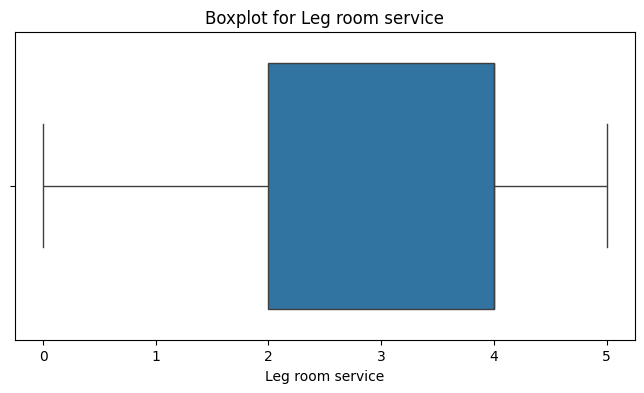

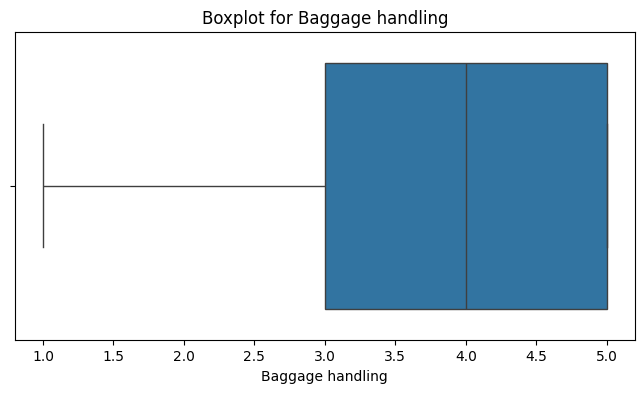

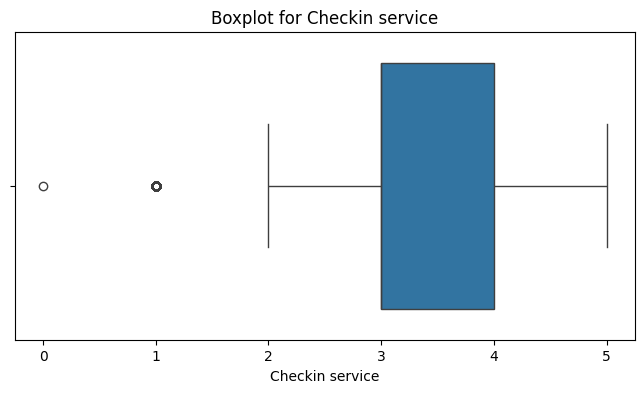

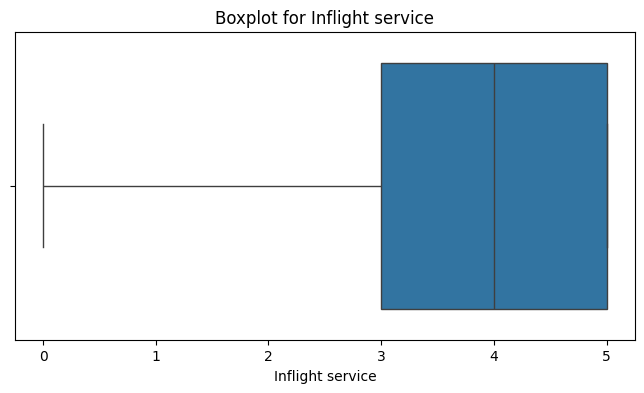

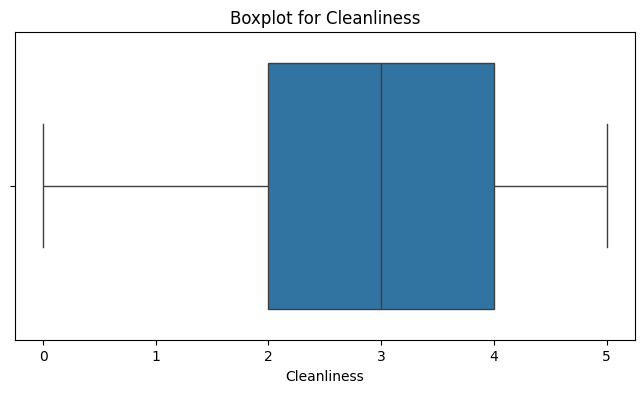

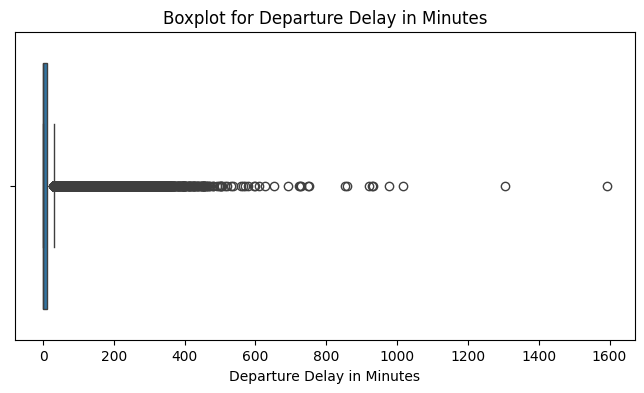

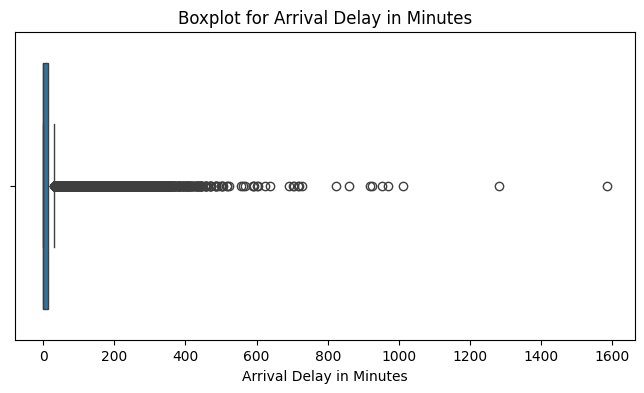

In [8]:
# Outlier Detection in Numerical Features

numeric_data = train_data.select_dtypes(include=['number'])

for column in numeric_data.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=numeric_data[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

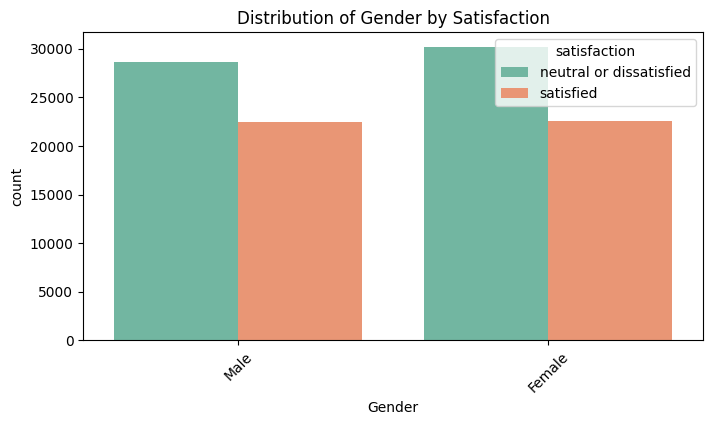

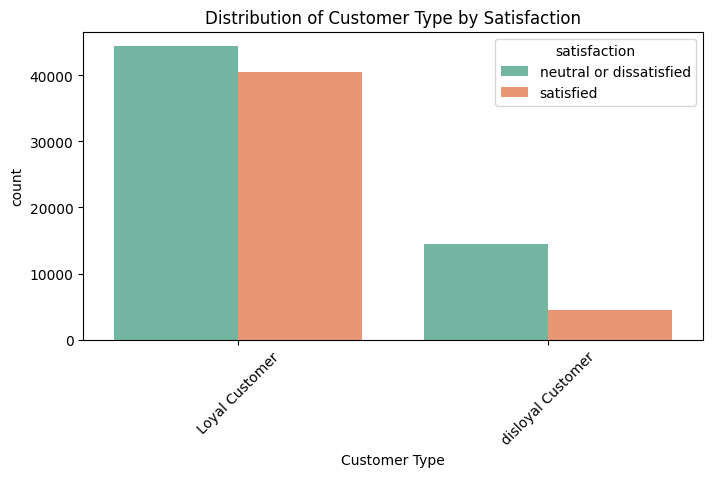

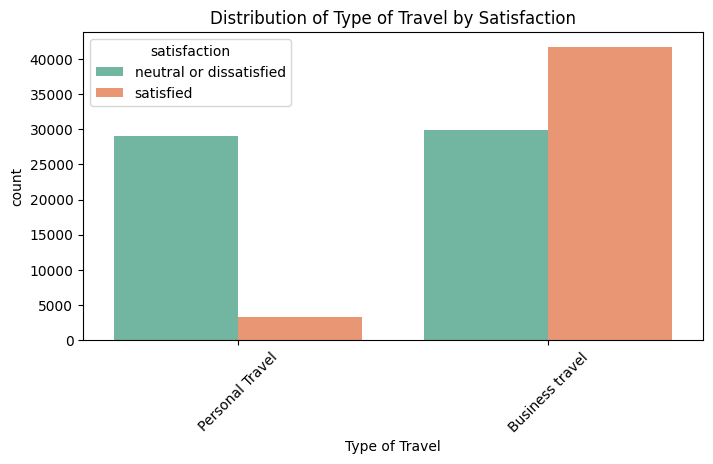

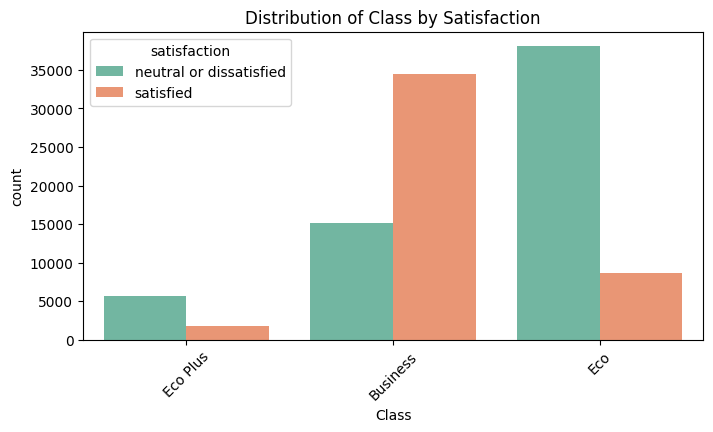

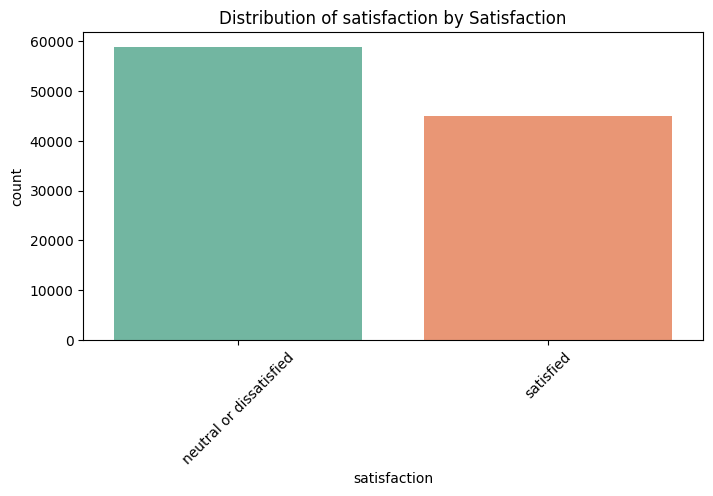

In [9]:
# Categorical Feature Analysis

categorical_columns = train_data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=train_data, hue="satisfaction", palette="Set2")
    plt.title(f"Distribution of {col} by Satisfaction")
    plt.xticks(rotation=45)
    plt.show()

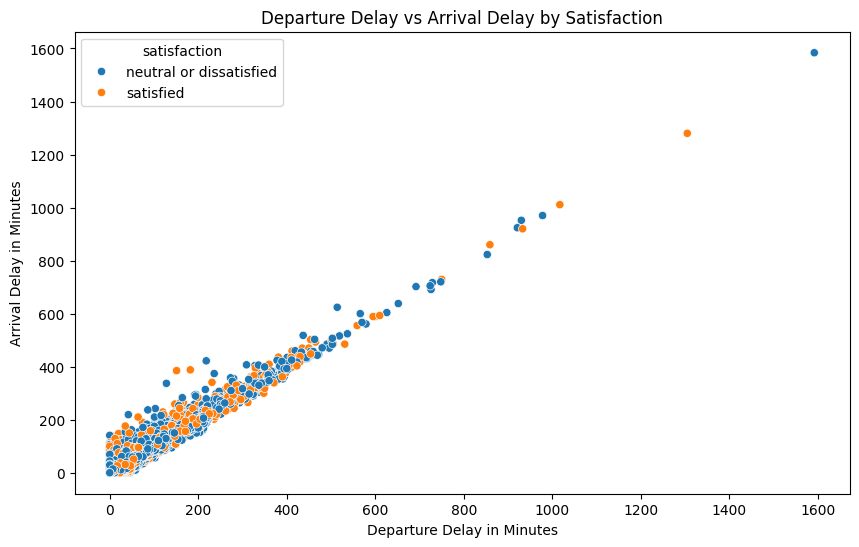

In [10]:
# Time Series Analysis

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', hue='satisfaction', data=train_data)
plt.title("Departure Delay vs Arrival Delay by Satisfaction")
plt.show()

Average Service Ratings by Satisfaction:
satisfaction            neutral or dissatisfied  satisfied
Inflight wifi service                  2.399633   3.161288
Ease of Online booking                 2.546850   3.031582
Food and drink                         2.958050   3.521310
Online boarding                        2.656125   4.027474
Seat comfort                           3.036295   3.966530
Inflight entertainment                 2.894156   3.964931


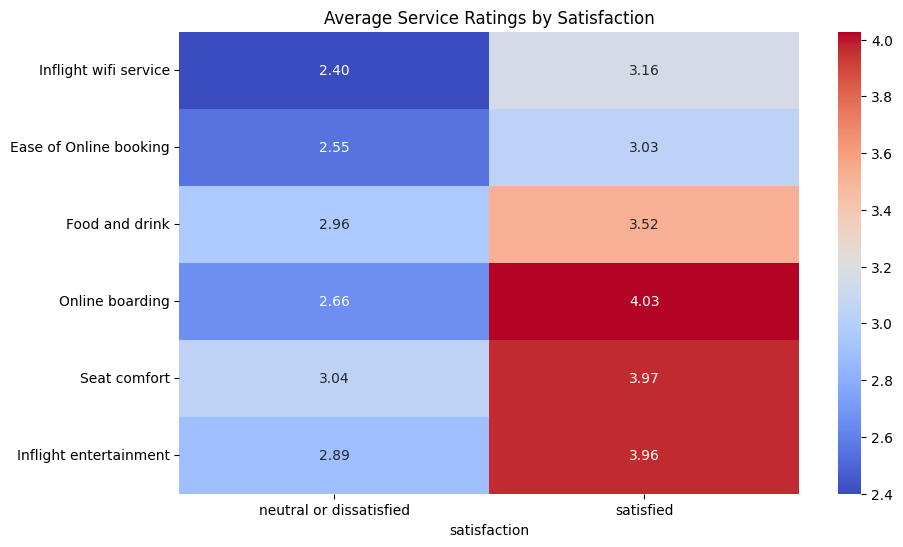

In [11]:
# Average service rating by satisfaction
service_columns = [
    'Inflight wifi service', 'Ease of Online booking', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment']

service_avg = train_data.groupby('satisfaction')[service_columns].mean()
print("Average Service Ratings by Satisfaction:")
print(service_avg.T)

plt.figure(figsize=(10, 6))
sns.heatmap(service_avg.T, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Average Service Ratings by Satisfaction")
plt.show()

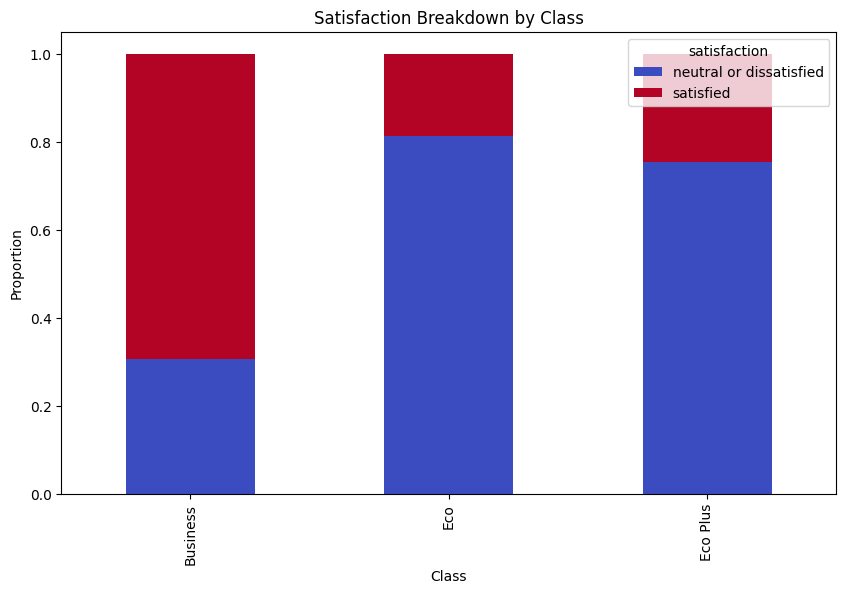

In [12]:
# Stacked bar plot for satisfaction breakdown
satisfaction_breakdown = pd.crosstab(train_data['Class'], train_data['satisfaction'], normalize='index')
satisfaction_breakdown.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="coolwarm")
plt.title("Satisfaction Breakdown by Class")
plt.xlabel("Class")
plt.ylabel("Proportion")
plt.show()

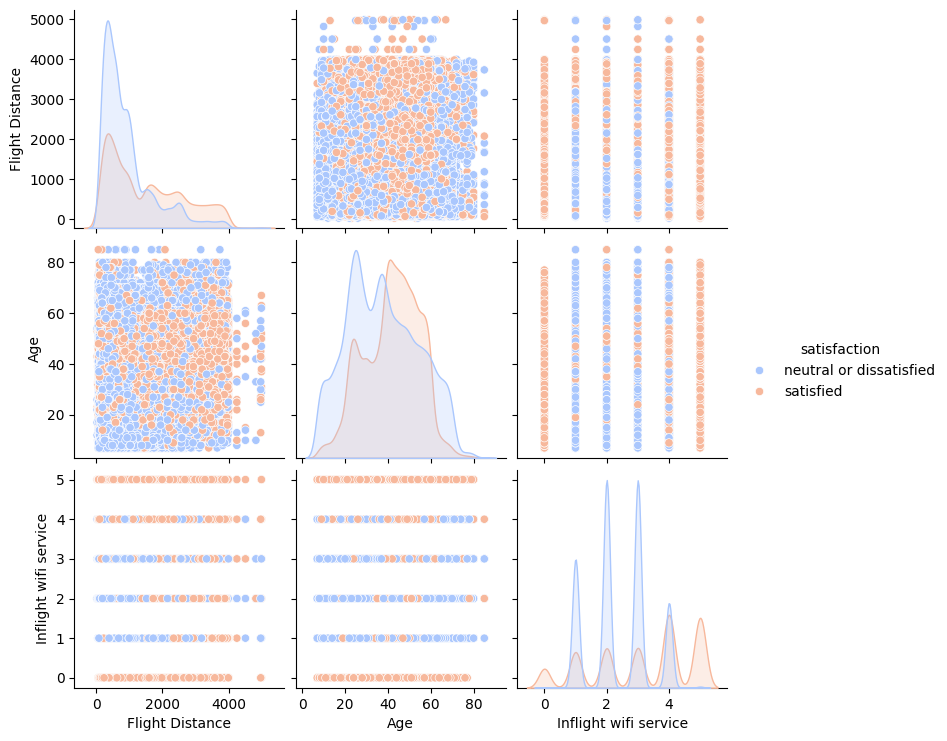

In [13]:
# Pairplot

sns.pairplot(train_data, vars=['Flight Distance', 'Age', 'Inflight wifi service'], hue='satisfaction', palette="coolwarm")
plt.show()

# Feature Engineering

In [14]:
data = train_data.copy()

In [15]:
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [16]:
data['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [17]:
data['satisfaction'] = data['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)
print(data['satisfaction'].value_counts())

0    58879
1    45025
Name: satisfaction, dtype: int64


In [18]:
label_encoder = LabelEncoder()

data['Gender'] = label_encoder.fit_transform(data['Gender'])

data = pd.get_dummies(data, columns=['Customer Type', 'Type of Travel', 'Class'], drop_first=True)

In [19]:
data['Ease of Booking * Online Boarding'] = data['Ease of Online booking'] * data['Online boarding']

data['Flight Distance * Seat Comfort'] = data['Flight Distance'] * data['Seat comfort']

In [20]:
data['Delay per Distance'] = (
    (data['Departure Delay in Minutes'] + data['Arrival Delay in Minutes']) / 
    data['Flight Distance']).replace([float('inf'), -float('inf')], 0)

scaler = MinMaxScaler()

data['Delay per Distance'] = scaler.fit_transform(data[['Delay per Distance']])

In [21]:
service_features = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service',
    'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

# Compute the mean score for service quality
data['Service Quality Score'] = data[service_features].mean(axis=1)

# Normalize the new feature for consistent scaling
data['Service Quality Score'] = scaler.fit_transform(data[['Service Quality Score']])

In [22]:
data.drop(['Ease of Online booking','Online boarding','Flight Distance',
                 'Seat comfort','Departure Delay in Minutes','Arrival Delay in Minutes',
                'Flight Distance'], axis=1, inplace=True)

In [23]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Inflight wifi service              103904 non-null  int64  
 4   Departure/Arrival time convenient  103904 non-null  int64  
 5   Gate location                      103904 non-null  int64  
 6   Food and drink                     103904 non-null  int64  
 7   Inflight entertainment             103904 non-null  int64  
 8   On-board service                   103904 non-null  int64  
 9   Leg room service                   103904 non-null  int64  
 10  Baggage handling                   103904 non-null  int64  
 11  Checkin service                    1039

In [24]:
data.isna().sum()

id                                     0
Gender                                 0
Age                                    0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Gate location                          0
Food and drink                         0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
satisfaction                           0
Customer Type_disloyal Customer        0
Type of Travel_Personal Travel         0
Class_Eco                              0
Class_Eco Plus                         0
Ease of Booking * Online Boarding      0
Flight Distance * Seat Comfort         0
Delay per Distance                   310
Service Quality Score                  0
dtype: int64

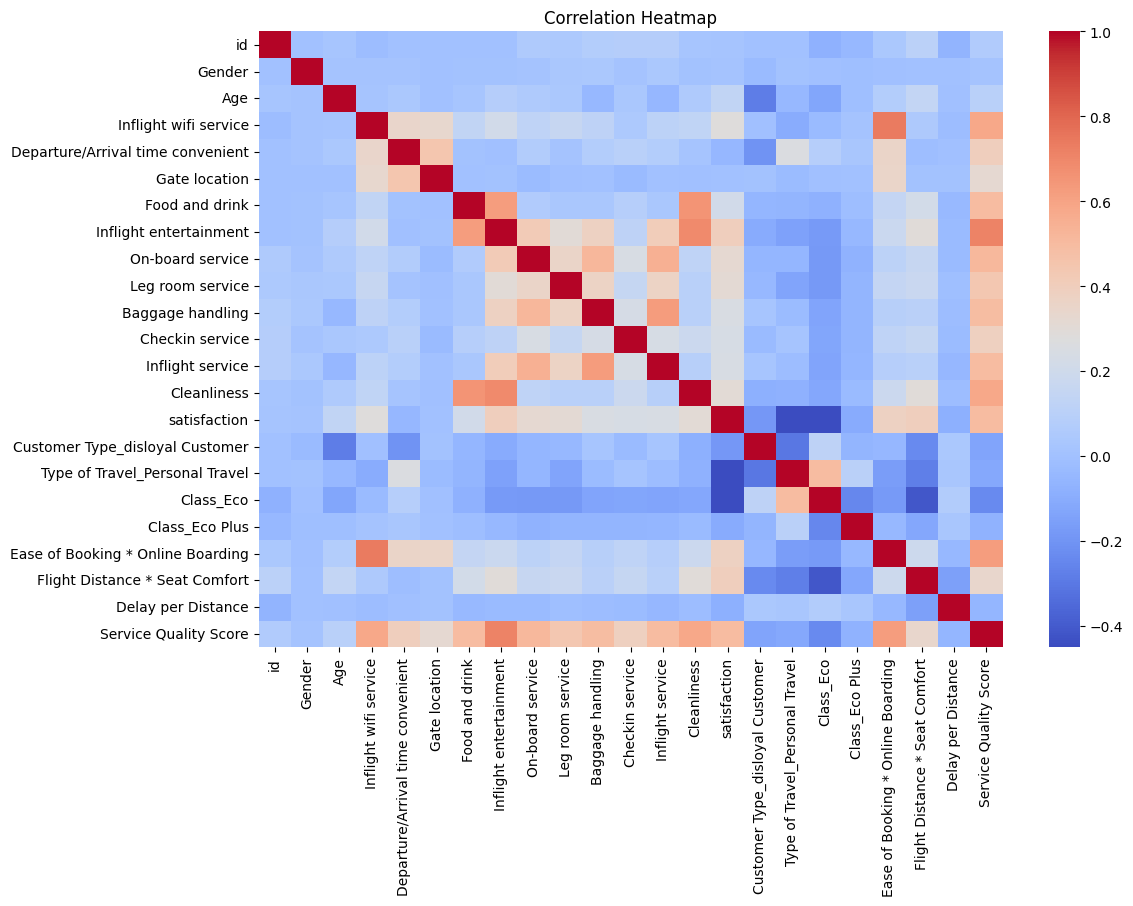

In [25]:
## Correlation HeatMap

numeric_data = data.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [26]:
# Remove highly correlated features
corr_matrix = numeric_data.corr().abs()
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

data_reduced = data.drop(columns=to_drop)

# Train Test Split

In [27]:
X = data_reduced.drop(columns=['satisfaction'])
y = data_reduced['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
X_train.head()

,id,Gender,Age,Inflight wifi service,Departure/Arrival time convenient,Gate location,Food and drink,Inflight entertainment,On-board service,Leg room service,...,Inflight service,Cleanliness,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Ease of Booking * Online Boarding,Flight Distance * Seat Comfort,Delay per Distance,Service Quality Score
30633,107529,0,47,3,3,3,5,4,4,4,...,4,3,0,0,0,0,12,7605,0.000000,0.690909
98857,129312,1,35,3,3,4,3,3,5,5,...,4,3,1,0,0,0,9,12930,0.000000,0.709091
80498,42352,0,66,2,4,2,5,4,4,2,...,4,5,0,1,1,0,8,2750,0.027675,0.636364
73981,33349,1,26,5,4,1,3,3,5,1,...,4,3,1,0,1,0,20,3807,0.000000,0.618182
70633,92993,1,48,1,5,2,4,4,5,2,...,5,4,0,1,1,0,0,2952,0.014566,0.509091


In [29]:
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Target distribution in training set:\n{y_train.value_counts(normalize=True)}")
print(f"Target distribution in test set:\n{y_test.value_counts(normalize=True)}")

Training set size: (83123, 22)
Test set size: (20781, 22)
Target distribution in training set:
0    0.566666
1    0.433334
Name: satisfaction, dtype: float64
Target distribution in test set:
0    0.566671
1    0.433329
Name: satisfaction, dtype: float64


# Modelling

Glassbox Models - Logistic Regression, Decision Trees

BlackBox Models - Random Forest, CatBoost, LightGBM

In [30]:
## Create empty data frame to store evaluation metrics and loss values across all models


cols = ['Model', 'Precision', 'Recall', 'Accuracy', 'F1_Score', 'Log Loss',
        'Misclassification_Rate', 'AUC']

eval_loss = pd.DataFrame(columns=cols)
eval_loss.head()

,Model,Precision,Recall,Accuracy,F1_Score,Log Loss,Misclassification_Rate,AUC


## LightBox Models

### Logistic Regression

In [31]:
# Ensure 'satisfaction' exists in the dataset
if 'satisfaction' not in data_reduced.columns:
    raise KeyError("'satisfaction' column is missing in the dataset.")

# Select numeric columns (excluding the target column 'satisfaction')
numeric_columns = data_reduced.select_dtypes(include=['number']).columns.drop('satisfaction')

# Check and drop zero-variance columns
zero_variance_cols = data_reduced[numeric_columns].std() == 0
if zero_variance_cols.any():
    print("Dropping zero-variance columns:", numeric_columns[zero_variance_cols].tolist())
    data_reduced = data_reduced.drop(columns=numeric_columns[zero_variance_cols])

# Scale numeric features (excluding 'satisfaction')
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(data_reduced[numeric_columns])
scaled_numeric_data = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

# Handle any infinities or NaNs in scaled data
scaled_numeric_data.replace([np.inf, -np.inf], np.nan, inplace=True)
scaled_numeric_data.fillna(0, inplace=True)

# Retain the target column separately
target_column = data_reduced['satisfaction'].reset_index(drop=True)

# Combine scaled numeric data with non-numeric features (excluding the target column)
non_numeric_data = data_reduced.select_dtypes(exclude=['number']).reset_index(drop=True)
data_log = pd.concat(
    [scaled_numeric_data.reset_index(drop=True), 
     non_numeric_data, 
     target_column], 
    axis=1)

# Split into features and target
X_log = data_log.drop(columns=['satisfaction'])
y_log = data_log['satisfaction']

# Ensure target variable is categorical (or leave as integer if binary classification)
if y_log.isnull().any():
    raise ValueError("Target column 'satisfaction' contains missing values!")
if y_log.nunique() <= 2:  # Binary classification case
    y_log = y_log.astype(int)


In [32]:
# Train-Test split for logistic regressison only
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log, test_size=0.2, random_state=42, stratify=y_log)

# Fit Model
model_log = LogisticRegression(max_iter=1000, random_state=42)
model_log.fit(X_train_log, y_train_log)

# Make predictions on the test set
y_pred_log = model_log.predict(X_test_log)

# Evaluate the model
accuracy = accuracy_score(y_test_log, y_pred_log)
conf_matrix = confusion_matrix(y_test_log, y_pred_log)
class_report = classification_report(y_test_log, y_pred_log)

# Print evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8679563062412781
Confusion Matrix:
[[10511  1265]
 [ 1479  7526]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     11776
           1       0.86      0.84      0.85      9005

    accuracy                           0.87     20781
   macro avg       0.87      0.86      0.87     20781
weighted avg       0.87      0.87      0.87     20781



In [34]:
# Add values to eval_loss datafram

model_name = 'Logistic Regression'

# Precision
precision = precision_score(y_test_log, y_pred_log)

# Recall
recall = recall_score(y_test_log, y_pred_log)

# Accuracy
accuracy = accuracy_score(y_test_log, y_pred_log)

# F1 Score
f1 = f1_score(y_test_log, y_pred_log)

# Log Loss
log_loss_value = log_loss(y_test_log, y_pred_log)

# Misclassification Rate
misclassification_rate = 1 - (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()

# AUC
auc = roc_auc_score(y_test_log, y_pred_log)






eval_loss = eval_loss.append({
    'Model':model_name,
 'Precision':precision,
 'Recall':recall,
 'Accuracy':accuracy,
 'F1_Score':f1,
 'Log Loss':log_loss_value,
 'Misclassification_Rate':misclassification_rate,
 'AUC':auc
}, ignore_index=True)



eval_loss.head()

/var/folders/bv/rj9p419515b1vs8pm1fxns6w0000gn/T/ipykernel_1288/3505735479.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_loss = eval_loss.append({


,Model,Precision,Recall,Accuracy,F1_Score,Log Loss,Misclassification_Rate,AUC
0,Logistic Regression,0.856103,0.835758,0.867956,0.845808,4.759337,0.132044,0.864168


### Decision Trees

Best Parameters from Randomized Search: {'min_samples_split': 6, 'min_samples_leaf': 3, 'max_depth': 13, 'criterion': 'entropy'}
Best Cross-Validation Accuracy: 0.9473069840144153
Decision Tree Classifier Performance (with Best Parameters):
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     11776
           1       0.95      0.93      0.94      9005

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781

Confusion Matrix:
 [[11317   459]
 [  625  8380]]
Accuracy Score: 0.9478369664597469


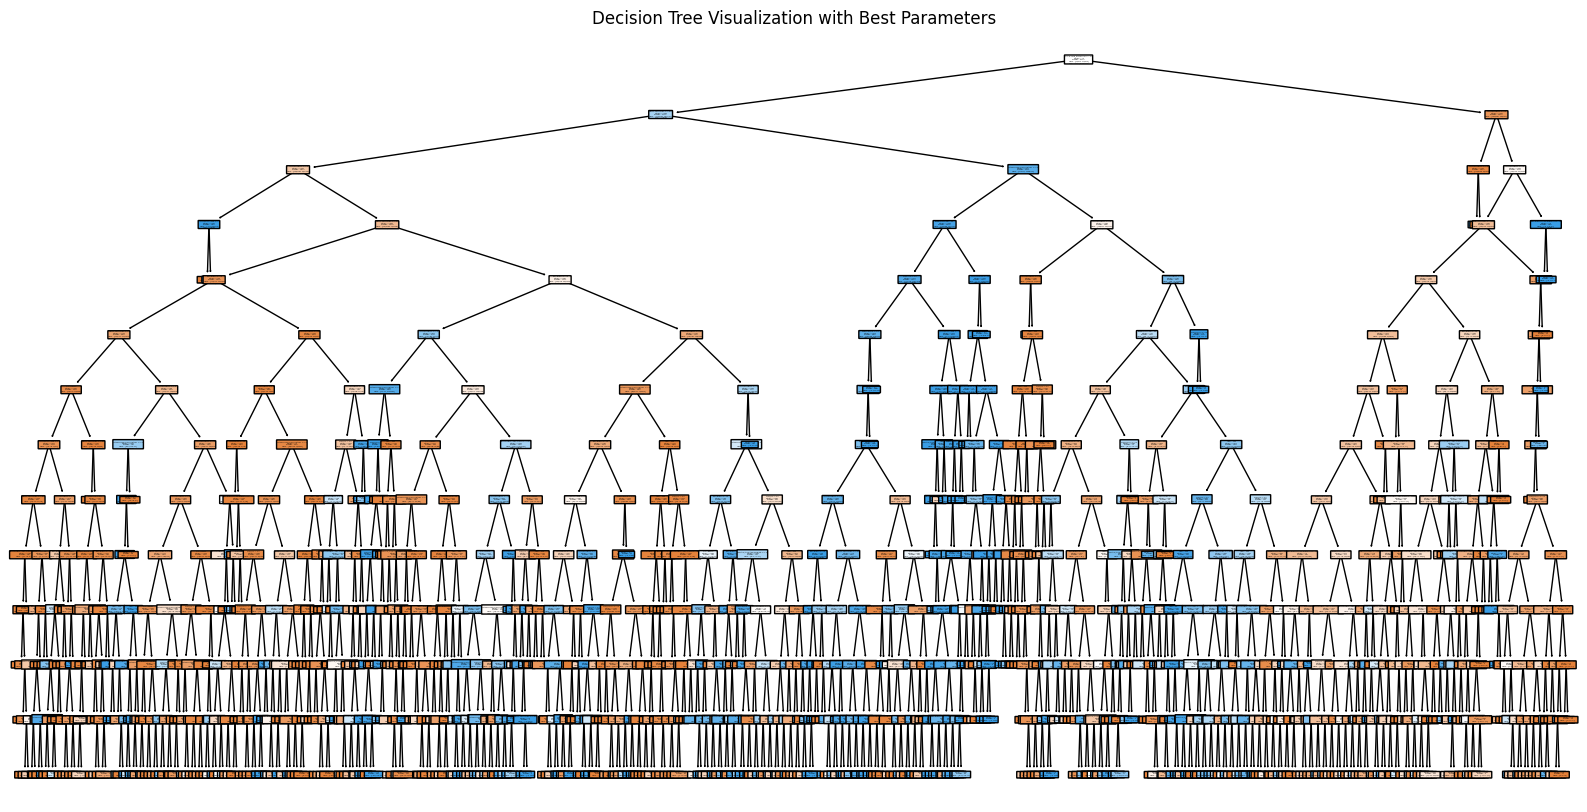

In [35]:
# Define Hyperparameter Grid for Random Search
param_grid = {
    'max_depth': np.arange(3, 20),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20),
    'criterion': ['gini', 'entropy']}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print Best Parameters and Cross-Validation Score
print("Best Parameters from Randomized Search:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Use Best Parameters to Train Final Decision Tree
best_dt = random_search.best_estimator_
best_dt.fit(X_train, y_train)

# Predict on Test Data
y_pred_dt = best_dt.predict(X_test)

# Evaluate Model Performance
print("Decision Tree Classifier Performance (with Best Parameters):")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    best_dt, 
    feature_names=X_train.columns,  # Ensure X_train is a DataFrame
    class_names=["Neutral/Dissatisfied", "Satisfied"], 
    filled=True, 
    rounded=True)

plt.title("Decision Tree Visualization with Best Parameters")
plt.show()

In [36]:
# Re-train the Decision Tree with depth limitation
pruned_tree = DecisionTreeClassifier(
    max_depth=10,  # Adjust this based on cross-validation performance
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    class_weight="balanced")

pruned_tree.fit(X_train, y_train)

# Evaluate on Test Data
y_pred_pruned = pruned_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_pruned)
conf_matrix = confusion_matrix(y_test, y_pred_pruned)
class_report = classification_report(y_test, y_pred_pruned)

# Print evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9430729993744286
Confusion Matrix:
[[11276   500]
 [  683  8322]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11776
           1       0.94      0.92      0.93      9005

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



In [37]:
# Add values to eval_loss datafram


model_name = 'Decision Tree'

# Precision
precision = precision_score(y_test, y_pred_pruned)

# Recall
recall = recall_score(y_test, y_pred_pruned)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_pruned)

# F1 Score
f1 = f1_score(y_test, y_pred_pruned)

# Log Loss
log_loss_value = log_loss(y_test, y_pred_pruned)

# Misclassification Rate
misclassification_rate = 1 - (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()

# AUC
auc = roc_auc_score(y_test, y_pred_pruned)






eval_loss = eval_loss.append({
    'Model':model_name,
 'Precision':precision,
 'Recall':recall,
 'Accuracy':accuracy,
 'F1_Score':f1,
 'Log Loss':log_loss_value,
 'Misclassification_Rate':misclassification_rate,
 'AUC':auc
}, ignore_index=True)



eval_loss.head()

/var/folders/bv/rj9p419515b1vs8pm1fxns6w0000gn/T/ipykernel_1288/2609265311.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_loss = eval_loss.append({


,Model,Precision,Recall,Accuracy,F1_Score,Log Loss,Misclassification_Rate,AUC
0,Logistic Regression,0.856103,0.835758,0.867956,0.845808,4.759337,0.132044,0.864168
1,Decision Tree,0.943324,0.924153,0.943073,0.933640,2.051857,0.056927,0.940847


## BlackBox Models

### LightGBM

In [38]:
# Define Optuna Objective Function

def objective(trial):
    param = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 50),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0)
    }
    
    model = LGBMClassifier(**param, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

# Optimize Hyperparameters with Optuna
start_time = time.time()
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # Adjust n_trials based on available compute
end_time = time.time()

# Train LightGBM with Best Parameters
best_params = study.best_params
print("Best Parameters:", best_params)

final_model = LGBMClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate the Model
y_pred_light = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_light)
conf_matrix = confusion_matrix(y_test, y_pred_light)
class_report = classification_report(y_test, y_pred_light)

# Print evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

[I 2024-11-23 18:24:35,965] A new study created in memory with name: no-name-4b1d046b-9179-4993-81e6-a2d806f2ac0a


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-23 18:24:36,913] Trial 0 finished with value: 0.9393910317178895 and parameters: {'num_leaves': 75, 'learning_rate': 0.037051899753813074, 'n_estimators': 100, 'max_depth': 5, 'min_child_samples': 37, 'colsample_bytree': 0.8302675069398169, 'subsample': 0.605605640320236}. Best is trial 0 with value: 0.9393910317178895.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-23 18:24:37,915] Trial 1 finished with value: 0.952744740822219 and parameters: {'num_leaves': 89, 'learning_rate': 0.16918870759906693, 'n_estimators': 202, 'max_depth': 3, 'min_child_samples': 13, 'colsample_bytree': 0.8079197027202104, 'subsample': 0.8165622804616408}. Best is trial 1 with value: 0.952744740822219.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-23 18:24:40,584] Trial 2 finished with value: 0.9603599564358442 and parameters: {'num_leaves': 23, 'learning_rate': 0.11064534699764852, 'n_estimators': 396, 'max_depth': 5, 'min_child_samples': 41, 'colsample_bytree': 0.7943608541420557, 'subsample': 0.6755374938923152}. Best is trial 2 with value: 0.9603599564358442.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Nu

[I 2024-11-23 18:24:41,407] Trial 3 finished with value: 0.9505792628829051 and parameters: {'num_leaves': 38, 'learning_rate': 0.16065342997910087, 'n_estimators': 165, 'max_depth': 3, 'min_child_samples': 31, 'colsample_bytree': 0.8239857646809523, 'subsample': 0.8196293789176877}. Best is trial 2 with value: 0.9603599564358442.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Nu

[I 2024-11-23 18:24:42,165] Trial 4 finished with value: 0.9198657507580308 and parameters: {'num_leaves': 72, 'learning_rate': 0.014845203305308852, 'n_estimators': 103, 'max_depth': 4, 'min_child_samples': 19, 'colsample_bytree': 0.9736271846114074, 'subsample': 0.8325646824512064}. Best is trial 2 with value: 0.9603599564358442.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-23 18:24:44,383] Trial 5 finished with value: 0.9580381005449137 and parameters: {'num_leaves': 59, 'learning_rate': 0.08359303842922974, 'n_estimators': 427, 'max_depth': 4, 'min_child_samples': 40, 'colsample_bytree': 0.8060743463017519, 'subsample': 0.8237633831506798}. Best is trial 2 with value: 0.9603599564358442.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000890 seconds.
You can set `force_row_wise=true`

[I 2024-11-23 18:24:48,213] Trial 6 finished with value: 0.9617434425814295 and parameters: {'num_leaves': 53, 'learning_rate': 0.15879381581631652, 'n_estimators': 423, 'max_depth': 9, 'min_child_samples': 13, 'colsample_bytree': 0.8586865192409177, 'subsample': 0.6034794794044617}. Best is trial 6 with value: 0.9617434425814295.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-23 18:24:49,522] Trial 7 finished with value: 0.9606847749788331 and parameters: {'num_leaves': 98, 'learning_rate': 0.1693954924502871, 'n_estimators': 130, 'max_depth': 6, 'min_child_samples': 22, 'colsample_bytree': 0.808420414761871, 'subsample': 0.9827985650346744}. Best is trial 6 with value: 0.9617434425814295.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-23 18:24:50,912] Trial 8 finished with value: 0.9487867592465282 and parameters: {'num_leaves': 39, 'learning_rate': 0.02017990975999287, 'n_estimators': 137, 'max_depth': 7, 'min_child_samples': 27, 'colsample_bytree': 0.6255509795841095, 'subsample': 0.993822854665674}. Best is trial 6 with value: 0.9617434425814295.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-23 18:24:54,520] Trial 9 finished with value: 0.9609734946123731 and parameters: {'num_leaves': 70, 'learning_rate': 0.08627547038477468, 'n_estimators': 417, 'max_depth': 6, 'min_child_samples': 27, 'colsample_bytree': 0.8784915616187581, 'subsample': 0.9554191737731967}. Best is trial 6 with value: 0.9617434425814295.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memor

[I 2024-11-23 18:24:57,636] Trial 10 finished with value: 0.9624291764058848 and parameters: {'num_leaves': 51, 'learning_rate': 0.12590547520781928, 'n_estimators': 325, 'max_depth': 10, 'min_child_samples': 49, 'colsample_bytree': 0.6802563467919048, 'subsample': 0.7142914942771657}. Best is trial 10 with value: 0.9624291764058848.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

[I 2024-11-23 18:25:00,487] Trial 11 finished with value: 0.9624532257014046 and parameters: {'num_leaves': 49, 'learning_rate': 0.13089463013587543, 'n_estimators': 315, 'max_depth': 10, 'min_child_samples': 10, 'colsample_bytree': 0.6732476285374179, 'subsample': 0.7087988109795538}. Best is trial 11 with value: 0.9624532257014046.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the 

[I 2024-11-23 18:25:03,259] Trial 12 finished with value: 0.9621284122240154 and parameters: {'num_leaves': 45, 'learning_rate': 0.12358425373371487, 'n_estimators': 306, 'max_depth': 10, 'min_child_samples': 47, 'colsample_bytree': 0.6544050775324846, 'subsample': 0.722736876808673}. Best is trial 11 with value: 0.9624532257014046.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001052 seconds.
You can set `force_row_wise=true`

[I 2024-11-23 18:25:05,306] Trial 13 finished with value: 0.9612742609652137 and parameters: {'num_leaves': 24, 'learning_rate': 0.1986305657678677, 'n_estimators': 312, 'max_depth': 8, 'min_child_samples': 49, 'colsample_bytree': 0.7058478450107302, 'subsample': 0.7214481827404581}. Best is trial 11 with value: 0.9624532257014046.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

[I 2024-11-23 18:25:07,640] Trial 14 finished with value: 0.9621765368667095 and parameters: {'num_leaves': 49, 'learning_rate': 0.13097427275111564, 'n_estimators': 243, 'max_depth': 10, 'min_child_samples': 10, 'colsample_bytree': 0.7156472159697663, 'subsample': 0.752069474266503}. Best is trial 11 with value: 0.9624532257014046.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the 

[I 2024-11-23 18:25:11,459] Trial 15 finished with value: 0.9630306917437965 and parameters: {'num_leaves': 64, 'learning_rate': 0.06607270769889431, 'n_estimators': 351, 'max_depth': 9, 'min_child_samples': 34, 'colsample_bytree': 0.7157393062058415, 'subsample': 0.6735317752319765}. Best is trial 15 with value: 0.9630306917437965.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace

[I 2024-11-23 18:25:16,610] Trial 16 finished with value: 0.9624532322143182 and parameters: {'num_leaves': 65, 'learning_rate': 0.05890654476637469, 'n_estimators': 498, 'max_depth': 8, 'min_child_samples': 32, 'colsample_bytree': 0.7468191271857867, 'subsample': 0.6534467312157288}. Best is trial 15 with value: 0.9630306917437965.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-23 18:25:21,783] Trial 17 finished with value: 0.962537443464291 and parameters: {'num_leaves': 64, 'learning_rate': 0.06128949906551339, 'n_estimators': 498, 'max_depth': 8, 'min_child_samples': 34, 'colsample_bytree': 0.7366393892450516, 'subsample': 0.652214039173705}. Best is trial 15 with value: 0.9630306917437965.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-23 18:25:27,501] Trial 18 finished with value: 0.9623690180697171 and parameters: {'num_leaves': 83, 'learning_rate': 0.057752511319181334, 'n_estimators': 478, 'max_depth': 8, 'min_child_samples': 35, 'colsample_bytree': 0.6039173915822953, 'subsample': 0.8965819433143113}. Best is trial 15 with value: 0.9630306917437965.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, 

[I 2024-11-23 18:25:31,414] Trial 19 finished with value: 0.9627058732008076 and parameters: {'num_leaves': 61, 'learning_rate': 0.06681593701094281, 'n_estimators': 367, 'max_depth': 9, 'min_child_samples': 44, 'colsample_bytree': 0.7659790074674957, 'subsample': 0.6500654041087338}. Best is trial 15 with value: 0.9630306917437965.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of neg

[I 2024-11-23 18:25:36,016] Trial 20 finished with value: 0.9621524702034201 and parameters: {'num_leaves': 82, 'learning_rate': 0.08471986265130771, 'n_estimators': 363, 'max_depth': 9, 'min_child_samples': 42, 'colsample_bytree': 0.9243170198631099, 'subsample': 0.769793102933067}. Best is trial 15 with value: 0.9630306917437965.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000920 seconds.
You can set `force_row_wise=true`

[I 2024-11-23 18:25:39,984] Trial 21 finished with value: 0.9630547555124578 and parameters: {'num_leaves': 61, 'learning_rate': 0.062067614670414814, 'n_estimators': 360, 'max_depth': 9, 'min_child_samples': 44, 'colsample_bytree': 0.7596724083182305, 'subsample': 0.6479594635841917}. Best is trial 21 with value: 0.9630547555124578.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

[I 2024-11-23 18:25:43,112] Trial 22 finished with value: 0.9627419634263715 and parameters: {'num_leaves': 59, 'learning_rate': 0.039536798040922715, 'n_estimators': 266, 'max_depth': 9, 'min_child_samples': 44, 'colsample_bytree': 0.7602076526704524, 'subsample': 0.6402637254798643}. Best is trial 21 with value: 0.9630547555124578.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-23 18:25:45,764] Trial 23 finished with value: 0.9601554451576486 and parameters: {'num_leaves': 56, 'learning_rate': 0.0411087729997994, 'n_estimators': 253, 'max_depth': 7, 'min_child_samples': 38, 'colsample_bytree': 0.7620117626672477, 'subsample': 0.6814924416672322}. Best is trial 21 with value: 0.9630547555124578.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the 

[I 2024-11-23 18:25:48,963] Trial 24 finished with value: 0.9625735344135121 and parameters: {'num_leaves': 68, 'learning_rate': 0.042729223225001355, 'n_estimators': 257, 'max_depth': 9, 'min_child_samples': 45, 'colsample_bytree': 0.7047282961212091, 'subsample': 0.6272607292815717}. Best is trial 21 with value: 0.9630547555124578.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of neg

[I 2024-11-23 18:25:53,553] Trial 25 finished with value: 0.9629705420915137 and parameters: {'num_leaves': 77, 'learning_rate': 0.028573909136123357, 'n_estimators': 351, 'max_depth': 9, 'min_child_samples': 44, 'colsample_bytree': 0.7758950117355892, 'subsample': 0.7730552826861721}. Best is trial 21 with value: 0.9630547555124578.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000969 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-23 18:25:57,691] Trial 26 finished with value: 0.9601554494995911 and parameters: {'num_leaves': 78, 'learning_rate': 0.028398017860739058, 'n_estimators': 352, 'max_depth': 7, 'min_child_samples': 28, 'colsample_bytree': 0.7216850138194405, 'subsample': 0.8798404752176407}. Best is trial 21 with value: 0.9630547555124578.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-23 18:26:03,172] Trial 27 finished with value: 0.957869686005196 and parameters: {'num_leaves': 89, 'learning_rate': 0.010076608910690479, 'n_estimators': 389, 'max_depth': 8, 'min_child_samples': 38, 'colsample_bytree': 0.8666412327902008, 'subsample': 0.777378828304983}. Best is trial 21 with value: 0.9630547555124578.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-23 18:26:08,119] Trial 28 finished with value: 0.9622968491971026 and parameters: {'num_leaves': 99, 'learning_rate': 0.07507933405489359, 'n_estimators': 341, 'max_depth': 9, 'min_child_samples': 50, 'colsample_bytree': 0.775796961583643, 'subsample': 0.6863123343345188}. Best is trial 21 with value: 0.9630547555124578.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

[I 2024-11-23 18:26:11,678] Trial 29 finished with value: 0.9626216626744919 and parameters: {'num_leaves': 75, 'learning_rate': 0.09827369447597728, 'n_estimators': 281, 'max_depth': 10, 'min_child_samples': 35, 'colsample_bytree': 0.8495672851337315, 'subsample': 0.7567009120290416}. Best is trial 21 with value: 0.9630547555124578.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-23 18:26:16,780] Trial 30 finished with value: 0.9620442089342702 and parameters: {'num_leaves': 79, 'learning_rate': 0.04600153917836236, 'n_estimators': 452, 'max_depth': 7, 'min_child_samples': 22, 'colsample_bytree': 0.666466288311202, 'subsample': 0.8544144075419392}. Best is trial 21 with value: 0.9630547555124578.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, 

[I 2024-11-23 18:26:20,208] Trial 31 finished with value: 0.9618517327968622 and parameters: {'num_leaves': 61, 'learning_rate': 0.027138993075532022, 'n_estimators': 280, 'max_depth': 9, 'min_child_samples': 45, 'colsample_bytree': 0.7797272348530568, 'subsample': 0.6252075077408618}. Best is trial 21 with value: 0.9630547555124578.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000907 seconds.
You can set `force_row_wise=true`

[I 2024-11-23 18:26:23,106] Trial 32 finished with value: 0.9629344511422927 and parameters: {'num_leaves': 67, 'learning_rate': 0.049821152207414836, 'n_estimators': 227, 'max_depth': 9, 'min_child_samples': 42, 'colsample_bytree': 0.7441397895693341, 'subsample': 0.6269354133785523}. Best is trial 21 with value: 0.9630547555124578.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-23 18:26:25,966] Trial 33 finished with value: 0.9622727774682133 and parameters: {'num_leaves': 86, 'learning_rate': 0.0534100147302292, 'n_estimators': 208, 'max_depth': 8, 'min_child_samples': 41, 'colsample_bytree': 0.8330612094543253, 'subsample': 0.6004177601250689}. Best is trial 21 with value: 0.9630547555124578.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

[I 2024-11-23 18:26:28,835] Trial 34 finished with value: 0.9621524962550746 and parameters: {'num_leaves': 72, 'learning_rate': 0.028770341147330254, 'n_estimators': 205, 'max_depth': 10, 'min_child_samples': 38, 'colsample_bytree': 0.7356806529508599, 'subsample': 0.6754495461126058}. Best is trial 21 with value: 0.9630547555124578.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace

[I 2024-11-23 18:26:33,381] Trial 35 finished with value: 0.9626096412831886 and parameters: {'num_leaves': 68, 'learning_rate': 0.1023837829305424, 'n_estimators': 382, 'max_depth': 9, 'min_child_samples': 47, 'colsample_bytree': 0.6867540870791056, 'subsample': 0.7941766367888933}. Best is trial 21 with value: 0.9630547555124578.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-23 18:26:37,485] Trial 36 finished with value: 0.9624652673551057 and parameters: {'num_leaves': 75, 'learning_rate': 0.07074888638584381, 'n_estimators': 334, 'max_depth': 8, 'min_child_samples': 41, 'colsample_bytree': 0.7913372097263934, 'subsample': 0.6931770980039167}. Best is trial 21 with value: 0.9630547555124578.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-23 18:26:39,206] Trial 37 finished with value: 0.9551869184510844 and parameters: {'num_leaves': 94, 'learning_rate': 0.05050761850045619, 'n_estimators': 227, 'max_depth': 5, 'min_child_samples': 43, 'colsample_bytree': 0.8233222415030709, 'subsample': 0.7375061634848626}. Best is trial 21 with value: 0.9630547555124578.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-23 18:26:42,625] Trial 38 finished with value: 0.962597601800459 and parameters: {'num_leaves': 64, 'learning_rate': 0.07872743025642745, 'n_estimators': 289, 'max_depth': 9, 'min_child_samples': 47, 'colsample_bytree': 0.6391067486287836, 'subsample': 0.6214303858275203}. Best is trial 21 with value: 0.9630547555124578.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000897 seconds.
You can set `force_row_wise=true`

[I 2024-11-23 18:26:44,470] Trial 39 finished with value: 0.9627178931447965 and parameters: {'num_leaves': 41, 'learning_rate': 0.09306709702110316, 'n_estimators': 179, 'max_depth': 10, 'min_child_samples': 39, 'colsample_bytree': 0.7441216341775152, 'subsample': 0.6685604365217234}. Best is trial 21 with value: 0.9630547555124578.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-23 18:26:46,330] Trial 40 finished with value: 0.9338931375599732 and parameters: {'num_leaves': 56, 'learning_rate': 0.02084475892451085, 'n_estimators': 407, 'max_depth': 3, 'min_child_samples': 36, 'colsample_bytree': 0.7943862212895679, 'subsample': 0.7973046042524006}. Best is trial 21 with value: 0.9630547555124578.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-23 18:26:49,477] Trial 41 finished with value: 0.9625133999580278 and parameters: {'num_leaves': 56, 'learning_rate': 0.035363048978574535, 'n_estimators': 264, 'max_depth': 9, 'min_child_samples': 43, 'colsample_bytree': 0.7548492241757009, 'subsample': 0.6350177869586076}. Best is trial 21 with value: 0.9630547555124578.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

[I 2024-11-23 18:26:52,536] Trial 42 finished with value: 0.9619239110770188 and parameters: {'num_leaves': 71, 'learning_rate': 0.03544713765556878, 'n_estimators': 232, 'max_depth': 9, 'min_child_samples': 32, 'colsample_bytree': 0.697943663187464, 'subsample': 0.6436892277866565}. Best is trial 21 with value: 0.9630547555124578.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-23 18:26:56,641] Trial 43 finished with value: 0.9625374441879483 and parameters: {'num_leaves': 59, 'learning_rate': 0.049138414566152165, 'n_estimators': 376, 'max_depth': 8, 'min_child_samples': 45, 'colsample_bytree': 0.7240065513181897, 'subsample': 0.6127543755045122}. Best is trial 21 with value: 0.9630547555124578.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

[I 2024-11-23 18:26:59,019] Trial 44 finished with value: 0.963223183078003 and parameters: {'num_leaves': 66, 'learning_rate': 0.06426563057890301, 'n_estimators': 168, 'max_depth': 10, 'min_child_samples': 47, 'colsample_bytree': 0.7776843008409928, 'subsample': 0.6659527069383558}. Best is trial 44 with value: 0.963223183078003.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

[I 2024-11-23 18:27:01,091] Trial 45 finished with value: 0.9628742949770963 and parameters: {'num_leaves': 65, 'learning_rate': 0.11331297811976157, 'n_estimators': 160, 'max_depth': 10, 'min_child_samples': 47, 'colsample_bytree': 0.8148483643323933, 'subsample': 0.6960988947202197}. Best is trial 44 with value: 0.963223183078003.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

[I 2024-11-23 18:27:02,932] Trial 46 finished with value: 0.9627660423918314 and parameters: {'num_leaves': 76, 'learning_rate': 0.06703936466830816, 'n_estimators': 119, 'max_depth': 10, 'min_child_samples': 40, 'colsample_bytree': 0.787299918183247, 'subsample': 0.666674357278186}. Best is trial 44 with value: 0.963223183078003.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

[I 2024-11-23 18:27:05,276] Trial 47 finished with value: 0.9626336941969938 and parameters: {'num_leaves': 69, 'learning_rate': 0.09126187602384762, 'n_estimators': 177, 'max_depth': 10, 'min_child_samples': 29, 'colsample_bytree': 0.8421335446235761, 'subsample': 0.7386533961656233}. Best is trial 44 with value: 0.963223183078003.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-11-23 18:27:08,502] Trial 48 finished with value: 0.9612020790667717 and parameters: {'num_leaves': 53, 'learning_rate': 0.061590921055717555, 'n_estimators': 352, 'max_depth': 6, 'min_child_samples': 24, 'colsample_bytree': 0.9826250700764104, 'subsample': 0.7032425229443757}. Best is trial 44 with value: 0.963223183078003.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000943 seconds.
You can set `force_row_wise=true`

[I 2024-11-23 18:27:12,672] Trial 49 finished with value: 0.9623690144514316 and parameters: {'num_leaves': 46, 'learning_rate': 0.07950092434787084, 'n_estimators': 444, 'max_depth': 9, 'min_child_samples': 49, 'colsample_bytree': 0.8031349733066053, 'subsample': 0.6611167520381631}. Best is trial 44 with value: 0.963223183078003.


Best Parameters: {'num_leaves': 66, 'learning_rate': 0.06426563057890301, 'n_estimators': 168, 'max_depth': 10, 'min_child_samples': 47, 'colsample_bytree': 0.7776843008409928, 'subsample': 0.6659527069383558}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 36020, number of negative: 47103
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433334 -> initscore=-0.268262
[LightGBM] [Info] Start training from score -0.268262
Accuracy: 0.9643424281795872
Confusion Matrix:
[[11521   255]
 [  486  8519]]
Classification Report:
              precision    recall  f1-score   suppor

In [39]:
# Add values to eval_loss datafram


model_name = 'LightGBM'

# Precision
precision = precision_score(y_test, y_pred_light)

# Recall
recall = recall_score(y_test, y_pred_light)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_light)

# F1 Score
f1 = f1_score(y_test, y_pred_light)

# Log Loss
log_loss_value = log_loss(y_test, y_pred_light)

# Misclassification Rate
misclassification_rate = 1 - (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()

# AUC
auc = roc_auc_score(y_test, y_pred_light)






eval_loss = eval_loss.append({
    'Model':model_name,
 'Precision':precision,
 'Recall':recall,
 'Accuracy':accuracy,
 'F1_Score':f1,
 'Log Loss':log_loss_value,
 'Misclassification_Rate':misclassification_rate,
 'AUC':auc
}, ignore_index=True)



eval_loss.head()

/var/folders/bv/rj9p419515b1vs8pm1fxns6w0000gn/T/ipykernel_1288/4289059387.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_loss = eval_loss.append({


,Model,Precision,Recall,Accuracy,F1_Score,Log Loss,Misclassification_Rate,AUC
0,Logistic Regression,0.856103,0.835758,0.867956,0.845808,4.759337,0.132044,0.864168
1,Decision Tree,0.943324,0.924153,0.943073,0.933640,2.051857,0.056927,0.940847
2,LightGBM,0.970937,0.946030,0.964342,0.958322,1.285229,0.035658,0.962188


### CatBoost

In [40]:
# Define hyperparameter grid for Randomized Search
param_dist = {
    'iterations': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 50, 100],
    'cat_features': categorical_columns}

# Initialize CatBoost Classifier
catboost_model = CatBoostClassifier(random_seed=42, verbose=10)

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=catboost_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    verbose=10, 
    random_state=42,
    n_jobs=-1,
    scoring='accuracy')

# Fit the model using RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters found by RandomizedSearchCV
best_params = random_search.best_params_
print("Best Parameters found by RandomizedSearchCV:", best_params)

# Get the best model
best_catboost_model = random_search.best_estimator_

# Make predictions on the test set
y_pred_cat = best_catboost_model.predict(X_test)

# Evaluate the Model

accuracy = accuracy_score(y_test, y_pred_cat)
conf_matrix = confusion_matrix(y_test, y_pred_cat)
class_report = classification_report(y_test, y_pred_cat)

# Print evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


TypeError: Parameter grid for parameter 'cat_features' needs to be a list or a numpy array, but got Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object') (of type Index) instead. Single values need to be wrapped in a list with one element.

In [ ]:
# Add values to eval_loss datafram


model_name = 'CatBoost'

# Precision
precision = precision_score(y_test, y_pred_cat)

# Recall
recall = recall_score(y_test, y_pred_cat)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_cat)

# F1 Score
f1 = f1_score(y_test, y_pred_cat)

# Log Loss
log_loss_value = log_loss(y_test, y_pred_cat)

# Misclassification Rate
misclassification_rate = 1 - (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()

# AUC
auc = roc_auc_score(y_test, y_pred_cat)






eval_loss = eval_loss.append({
    'Model':model_name,
 'Precision':precision,
 'Recall':recall,
 'Accuracy':accuracy,
 'F1_Score':f1,
 'Log Loss':log_loss_value,
 'Misclassification_Rate':misclassification_rate,
 'AUC':auc
}, ignore_index=True)



eval_loss.head()

### Random Forest

In [41]:
# Define the hyperparameter grid for Random Forest tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 50, 100],        
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4],          
    'max_features': ['sqrt', 'log2', None]}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',         
    cv=5,   
    n_jobs=-1, 
    verbose=2               
)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best hyperparameters and cross-validation F1 score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation F1 score:", grid_search.best_score_)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict with the best model
y_pred_rf = best_model.predict(X_test)


# Evaluate the Model

accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

# Print evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.7s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.7s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.8s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.8s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.8s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=

In [ ]:
# Add values to eval_loss datafram


model_name = 'Random Forest'

# Precision
precision = precision_score(y_test, y_pred_rf)

# Recall
recall = recall_score(y_test, y_pred_rf)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)

# F1 Score
f1 = f1_score(y_test, y_pred_rf)

# Log Loss
log_loss_value = log_loss(y_test, y_pred_rf)

# Misclassification Rate
misclassification_rate = 1 - (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()

# AUC
auc = roc_auc_score(y_test, y_pred_rf)






eval_loss = eval_loss.append({
    'Model':model_name,
 'Precision':precision,
 'Recall':recall,
 'Accuracy':accuracy,
 'F1_Score':f1,
 'Log Loss':log_loss_value,
 'Misclassification_Rate':misclassification_rate,
 'AUC':auc
}, ignore_index=True)



eval_loss.head()

## SHAP Analysis

It provides insights into how each feature (or input variable) contributes to the model’s decision for a particular prediction. SHAP values are derived from Shapley values, which are originally from cooperative game theory. These values allocate a contribution to each feature based on how it affects the model’s output.

In [ ]:
# Logistic Regression - y_pred_log ; model_log
# Decision Tree - y_pred_pruned ; pruned_tree
# LightGBM - y_pred_light ; final_model
# Random Forest - y_pred_rf ; best_model
# Catboost - y_pred_cat ; best_catboost_model

In [2]:
def shap_analysis(model, X_train, model_type='default'):
    
    """
    Performs SHAP analysis on any model and dataset.
    
    Parameters:
    - model: The trained model to analyze (e.g., LogisticRegression, RandomForest, CatBoost, etc.)
    - X_train: The training data used to train the model (for SHAP analysis)
    - model_type: Type of model ('default', 'tree', or others). Default is for generic models (e.g., LogisticRegression)
    
    """
    
    if model_type == 'default':
        # For models like Logistic Regression etc
        explainer = shap.Explainer(model, X_train)
        shap_values = explainer(X_train)
    
    elif model_type == 'tree':
        # For tree-based models like RandomForest, LightGBM, CatBoost, etc.
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_train)
    
    else:
        raise ValueError("Model type not supported. Use 'default' or 'tree'.")
    
    # Global Explanation (Feature Importance)
    shap.summary_plot(shap_values, X_train)
    
    # Local Explanation (Single Prediction)
    shap.initjs()
    shap.force_plot(shap_values[0])

In [ ]:
# Logistic Regression (Default model type)
shap_analysis(model_log, X_train, model_type='default')

In [ ]:
# Random Forest (Tree-based model type)
shap_analysis(model_rf, X_train, model_type='tree')

In [ ]:
# LightGBM (Tree-based model type)
shap_analysis(model_lgb, X_train, model_type='tree')

In [ ]:
# CatBoost (Tree-based model type)
shap_analysis(model_catboost, X_train, model_type='tree')